# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #esta es nueva
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay #esta es nueva, me da el mapita de calor de roc curve
from sklearn.metrics import classification_report #esta es nueva, esta me va a decir todo el reporte

%matplotlib inline



In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

#el threshold es el que le pongo como parametro apra que quite los outliers de 1.5 o menos podemos hacerlo con menos mejor, pero si no ponemos nada
#pondra por defecto 1.5.
def outlier_slayer(data, threshold = 1.5): # automatically removes outliers based on Q1, Q3 #CUIDADO MEJOR VER EN BOX PLOTS Y VER QUE QUITAMOS#
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [6]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [8]:
# Your code here: What the dataset looks like?
websites.head()



,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [9]:
# Your code here:  What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [10]:
# Your code here: columns
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [11]:
# Your code here: Which columns contain the features of the websites?
#URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
        #'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       #'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       #'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       #'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       #'APP_PACKETS', 'DNS_QUERY_TIMES'

In [12]:
websites.Type.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [13]:
#Which column contains the feature we will predict? 
#The target is Type. 

#What is the code standing for benign vs malicious websites?
#De acuerdo con el value counts consideramos que el 0 es para paginas benignas y el 1 es para paginas malignas.

In [14]:
#Do we need to transform any of the columns from categorical to ordinal values? 
#No, 

#If so what are these columns?


In [15]:
len(websites)

1781

In [16]:
websites.nunique()

URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         8
SERVER                        238
CONTENT_LENGTH                637
WHOIS_COUNTRY                  48
WHOIS_STATEPRO                181
WHOIS_REGDATE                 890
WHOIS_UPDATED_DATE            593
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

In [17]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

<h2 style="color: #FF6347;">Copy as best practices</h2>

In [19]:
df = websites.copy()

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [21]:
# Your comment here
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

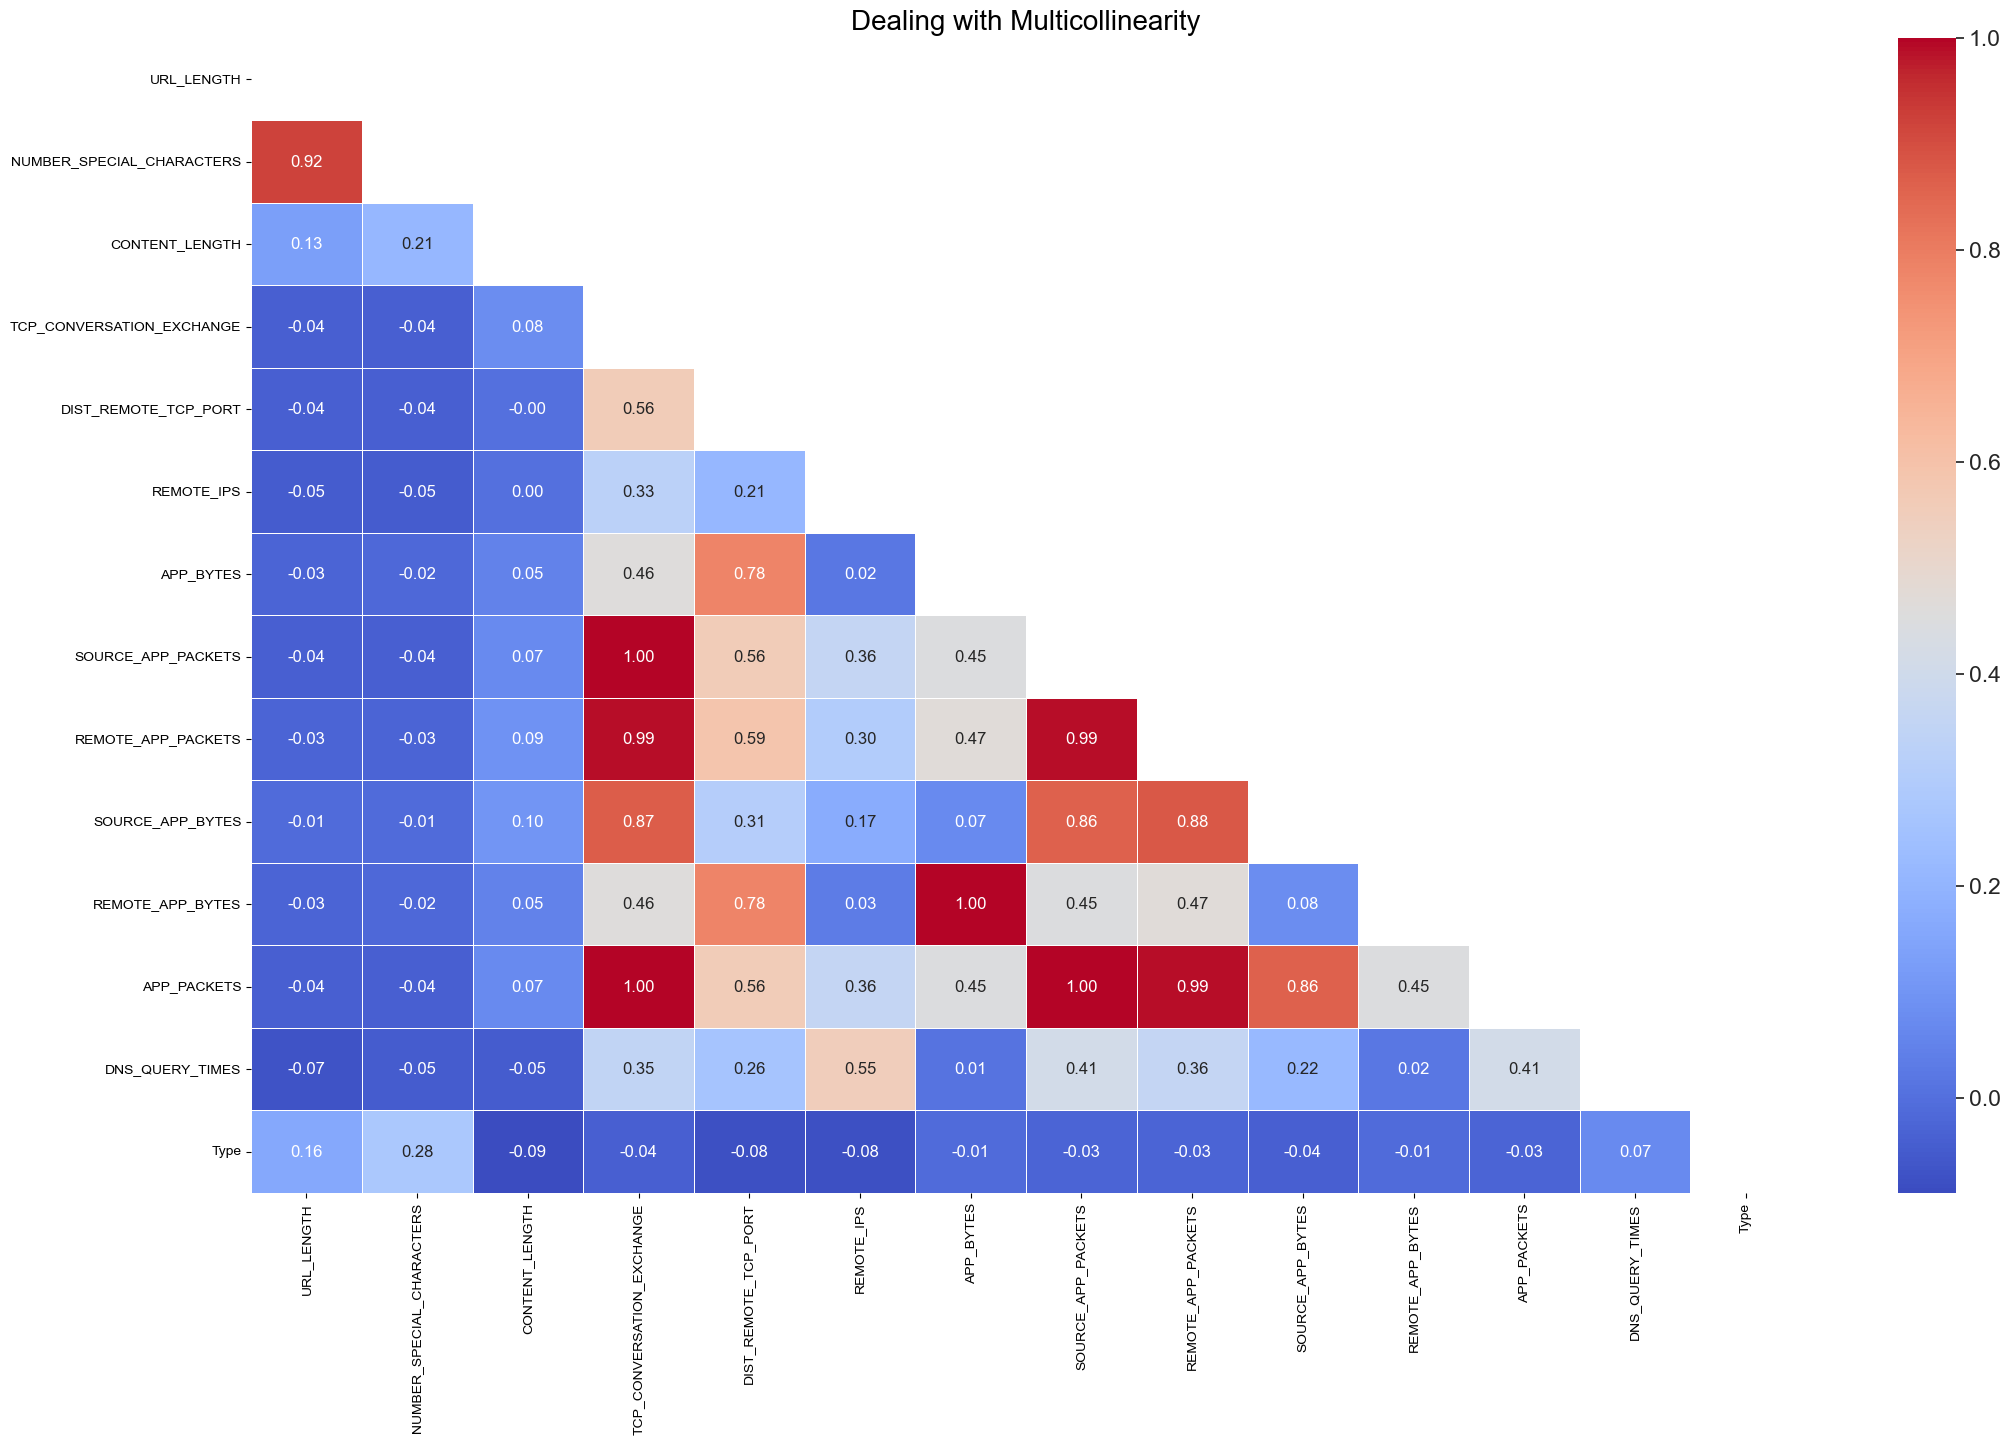

In [22]:
#You will create a correlation matrix using the numeric columns in the dataset. 
#Create a heatmap using seaborn to visualize which columns have high collinearity.
num_corr = round(num.corr(), 2)

mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [23]:
#Comment on which columns you might need to remove due to high collinearity.
#We need to erase the colums: SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, APP_PACKETS, REMOTE_APP_BYTES, SOURCE_APP_PACKETS



# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [25]:
# Your code here
df_clean = num.drop(columns = ["SOURCE_APP_PACKETS", "TCP_CONVERSATION_EXCHANGE","REMOTE_APP_PACKETS","APP_BYTES"])

In [26]:
# Your comment here
df_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,2,1153,832,9,2.0,1
1,16,6,15087.0,7,4,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,18784,4380,39,8.0,0
4,17,6,124140.0,2,5,129889,4586,61,4.0,0


In [27]:
len(num)

1781

In [28]:
len(df_clean)

1781

In [29]:
df_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,2,1153,832,9,2.0,1
1,16,6,15087.0,7,4,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,18784,4380,39,8.0,0
4,17,6,124140.0,2,5,129889,4586,61,4.0,0


In [30]:
num_corr_clean = round(df_clean.corr(), 2)

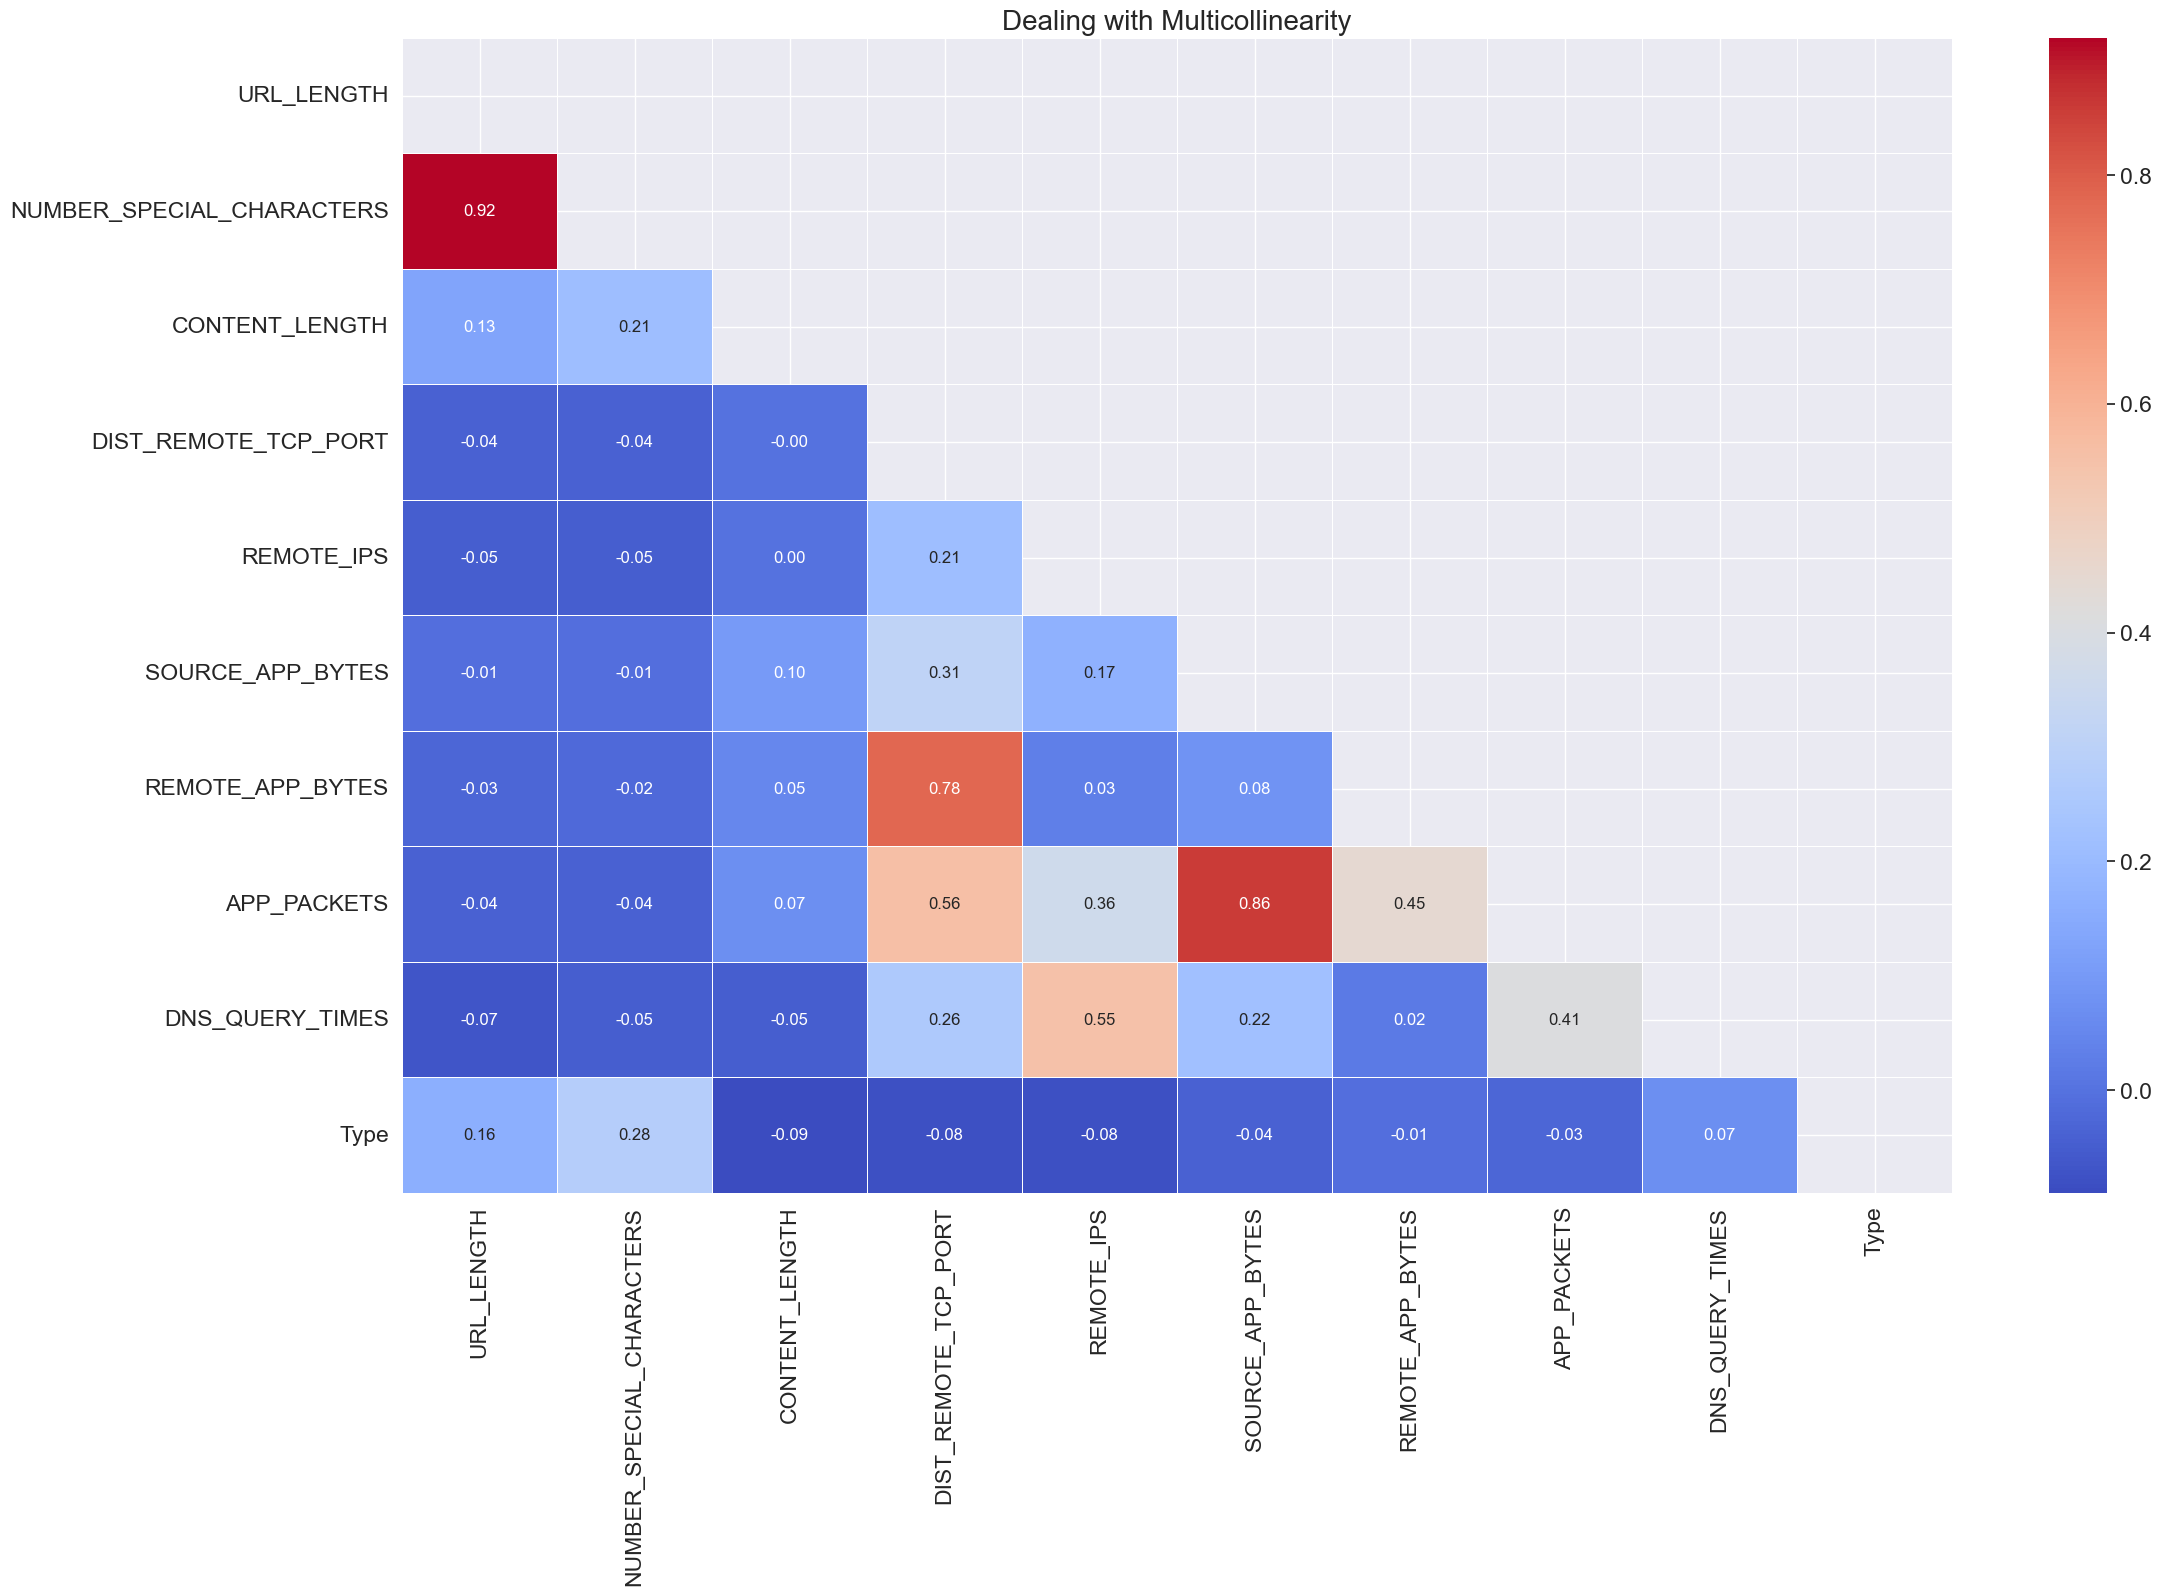

In [31]:
# Print heatmap again
mask = np.zeros_like(num_corr_clean)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr_clean, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [32]:
#if we really want all the corralation below 90 we should eliminate the column url_length.
#This column is really correlate with my target therefore i would leave this column.

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [34]:
# Your code here
df_clean.isna().sum()


URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CONTENT_LENGTH               812
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [36]:
# Your code here, we can put df_clean = df_clean.drop... or we can do it like: df_clean.drop(columns=["CONTENT_LENGTH"], inplace=True)
df_clean = df_clean.drop(columns = ["CONTENT_LENGTH"])

In [37]:
# Your comment here
#I decide to erase the column CONTENT_LENGTH because is the one with must na values, we cant use the mean to fill the na because this would move a lot
#our statistics. 

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [39]:
# Examine missing values in each column
df_clean.isna().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [40]:
df_clean['DNS_QUERY_TIMES'].fillna(method='ffill', inplace=True)

In [41]:
# Examine missing values in each column
df_clean.isna().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [44]:
cat.head()

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
0,M0_109,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN
1,B0_2314,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN
3,B0_113,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45
4,B0_403,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00


In [45]:
# Your code here
cat.WHOIS_COUNTRY.nunique()

48

In [46]:
cat.WHOIS_COUNTRY.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [47]:
#tengo esto cambialo por esto, key= a lo que tengo y value es lo que quiero
country_mapping = {
    'nan': None,
    'US': 'US',
    'us': 'US',
    'GB': 'GB',
    'UK': 'GB',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB',
    'RU': 'RU',
    'ru': 'RU',
    'AU': 'AU',
    'CA': 'CA',
    'PA': 'PA',
    'se': 'SE',
    'SE': 'SE',
    'IN': 'IN',
    'LU': 'LU',
    'TH': 'TH',
    'FR': 'FR',
    'NL': 'NL',
    'UG': 'UG',
    'JP': 'JP',
    'CN': 'CN',
    'SI': 'SI',
    'IL': 'IL',
    'KY': 'KY',
    'AT': 'AT',
    'CZ': 'CZ',
    'PH': 'PH',
    'BE': 'BE',
    'NO': 'NO',
    'TR': 'TR',
    'LV': 'LV',
    'DE': 'DE',
    'ES': 'ES',
    'BR': 'BR',
    'KR': 'KR',
    'HK': 'HK',
    'UA': 'UA',
    'CH': 'CH',
    'BS': 'BS',
    'PK': 'PK',
    'IT': 'IT',
    'CY': 'CY',
    'Cyprus': 'CY',
    'BY': 'BY',
    'AE': 'AE',
    'IE': 'IE',
    'UY': 'UY',
    'KG': 'KG'
}


In [48]:
len(country_mapping)

49

In [49]:
cat['WHOIS_COUNTRY'].replace(country_mapping, inplace=True)

In [50]:
cat.WHOIS_COUNTRY.nunique()

42

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [52]:
# Your code here
cat.WHOIS_COUNTRY.value_counts()


WHOIS_COUNTRY
US    1106
CA      84
ES      63
GB      35
AU      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
CH       6
NL       6
RU       6
KR       5
AT       4
BS       4
PH       4
SE       4
KY       3
TR       3
DE       3
HK       3
SC       3
BE       3
NO       2
UA       2
UY       2
CY       2
SI       2
KG       2
IL       2
BR       2
TH       1
PK       1
IT       1
UG       1
BY       1
AE       1
IE       1
LV       1
LU       1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [54]:
# Your code here
# Step 1: Get the top 10 values 

top_10_values = cat["WHOIS_COUNTRY"].value_counts().head(10).index 

#Step 2: Create a new column with values ‘OTHER’ for values not in top 10 

cat["WHOIS_COUNTRY"] = cat["WHOIS_COUNTRY"].apply(lambda x: x if x in top_10_values else "OTHER")

In [55]:
cat.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US       1106
OTHER     397
CA         84
ES         63
GB         35
AU         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [57]:
# Your code here
cat = cat.drop(columns = ["WHOIS_STATEPRO","WHOIS_REGDATE","WHOIS_UPDATED_DATE"])


In [58]:
cat.head()

,URL,CHARSET,SERVER,WHOIS_COUNTRY
0,M0_109,iso-8859-1,nginx,OTHER
1,B0_2314,UTF-8,Apache/2.4.10,OTHER
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,OTHER
3,B0_113,ISO-8859-1,nginx,US
4,B0_403,UTF-8,NaN,US


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [60]:
# Your code here
cat.dtypes

URL              object
CHARSET          object
SERVER           object
WHOIS_COUNTRY    object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [62]:
# Your code here
cat = cat.drop(columns = ["URL"])

In [63]:
cat.head()

,CHARSET,SERVER,WHOIS_COUNTRY
0,iso-8859-1,nginx,OTHER
1,UTF-8,Apache/2.4.10,OTHER
2,us-ascii,Microsoft-HTTPAPI/2.0,OTHER
3,ISO-8859-1,nginx,US
4,UTF-8,NaN,US


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [65]:
# Your code here
cat.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [67]:
# Your code here
cat.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

![Think Hard](../images/think-hard.jpg)

In [69]:
# Your comment here
#I think that i would use a regex to indicate that i want everything before the /.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [71]:
# Your code here
import re
regex = r"^[^/]+"
cat['SERVER'] = cat['SERVER'].apply(lambda x: re.match(regex, str(x)).group(0) if isinstance(x, str) and re.match(regex, str(x)) else x)

In [72]:
# Count `SERVER` value counts here
cat.SERVER.value_counts()

SERVER
Apache                622
nginx                 337
Microsoft-HTTPAPI     113
cloudflare-nginx       94
Microsoft-IIS          85
                     ... 
mw2103.codfw.wmnet      1
barista                 1
mw2190.codfw.wmnet      1
mw2107.codfw.wmnet      1
IdeaWebServer           1
Name: count, Length: 110, dtype: int64

In [73]:
top_3_server = cat["SERVER"].value_counts().head(3).index 

#Step 2: Create a new column with values ‘OTHER’ for values not in top 10 

cat["SERVER"] = cat["SERVER"].apply(lambda x: x if x in top_3_server else "OTHER")

In [74]:
cat.SERVER.value_counts()

SERVER
OTHER                709
Apache               622
nginx                337
Microsoft-HTTPAPI    113
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [76]:
cat.head()

,CHARSET,SERVER,WHOIS_COUNTRY
0,iso-8859-1,nginx,OTHER
1,UTF-8,Apache,OTHER
2,us-ascii,Microsoft-HTTPAPI,OTHER
3,ISO-8859-1,nginx,US
4,UTF-8,OTHER,US


In [77]:
website_dummy =pd.get_dummies(cat, prefix=['CHARSET', 'SERVER','WHOIS_COUNTRY'])

In [78]:
website_dummy.head()

,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Apache,SERVER_Microsoft-HTTPAPI,SERVER_OTHER,SERVER_nginx,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [80]:
# Your code here
website_dummy.dtypes


CHARSET_ISO-8859            bool
CHARSET_ISO-8859-1          bool
CHARSET_UTF-8               bool
CHARSET_iso-8859-1          bool
CHARSET_us-ascii            bool
CHARSET_utf-8               bool
CHARSET_windows-1251        bool
CHARSET_windows-1252        bool
SERVER_Apache               bool
SERVER_Microsoft-HTTPAPI    bool
SERVER_OTHER                bool
SERVER_nginx                bool
WHOIS_COUNTRY_AU            bool
WHOIS_COUNTRY_CA            bool
WHOIS_COUNTRY_CN            bool
WHOIS_COUNTRY_ES            bool
WHOIS_COUNTRY_FR            bool
WHOIS_COUNTRY_GB            bool
WHOIS_COUNTRY_IN            bool
WHOIS_COUNTRY_JP            bool
WHOIS_COUNTRY_OTHER         bool
WHOIS_COUNTRY_PA            bool
WHOIS_COUNTRY_US            bool
dtype: object

In [81]:
len(num.Type)

1781

In [82]:
len(cat)

1781

In [83]:
website_dummy["Type"] = num.Type

In [84]:
website_dummy.head()

,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Apache,SERVER_Microsoft-HTTPAPI,SERVER_OTHER,SERVER_nginx,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US,Type
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,1
1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0
3,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,0
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,0


In [85]:
website_dummy.columns

Index(['CHARSET_ISO-8859', 'CHARSET_ISO-8859-1', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'SERVER_Apache',
       'SERVER_Microsoft-HTTPAPI', 'SERVER_OTHER', 'SERVER_nginx',
       'WHOIS_COUNTRY_AU', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB',
       'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_US', 'Type'],
      dtype='object')

In [86]:
website_dummy = website_dummy.astype(int)

In [87]:
website_dummy.head()

,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Apache,SERVER_Microsoft-HTTPAPI,SERVER_OTHER,SERVER_nginx,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US,Type
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [88]:
df_clean.drop(columns = "Type", inplace =True)

In [89]:
df_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,0,2,1153,832,9,2.0
1,16,6,7,4,1265,1230,17,0.0
2,16,6,0,0,0,0,0,0.0
3,17,6,22,3,18784,4380,39,8.0
4,17,6,2,5,129889,4586,61,4.0


In [90]:
df_clean.reset_index(inplace=True)
website_dummy.reset_index(inplace=True)

In [91]:
df_clean.head()

,index,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,0,16,7,0,2,1153,832,9,2.0
1,1,16,6,7,4,1265,1230,17,0.0
2,2,16,6,0,0,0,0,0,0.0
3,3,17,6,22,3,18784,4380,39,8.0
4,4,17,6,2,5,129889,4586,61,4.0


In [92]:
df_final = df_clean.merge(website_dummy, on = ["index"],how="inner")

In [93]:
df_final.head()

,index,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Apache,SERVER_Microsoft-HTTPAPI,SERVER_OTHER,SERVER_nginx,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US,Type
0,0,16,7,0,2,1153,832,9,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,16,6,7,4,1265,1230,17,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,16,6,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,17,6,22,3,18784,4380,39,8.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,17,6,2,5,129889,4586,61,4.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
df_final.drop(columns = "index", inplace =True)

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [96]:
from sklearn.model_selection import train_test_split

# Your code here:
y = df_final["Type"]
X = df_final.drop(columns = ["Type"]) #pongo corchetes por si quiero mas de una columna 


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 1781.
80% for training data: 1424.
20% for test data: 357.


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [100]:
# Your code here:
model = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [102]:
# Your code here:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 357.


In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       306
           1       0.74      0.27      0.40        51

    accuracy                           0.88       357
   macro avg       0.81      0.63      0.67       357
weighted avg       0.87      0.88      0.86       357



In [225]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.927170868347339
Train data accuracy:  0.9487359550561798


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [105]:
# Your code here:
cm = confusion_matrix(y_test, predictions)


<Figure size 800x600 with 0 Axes>

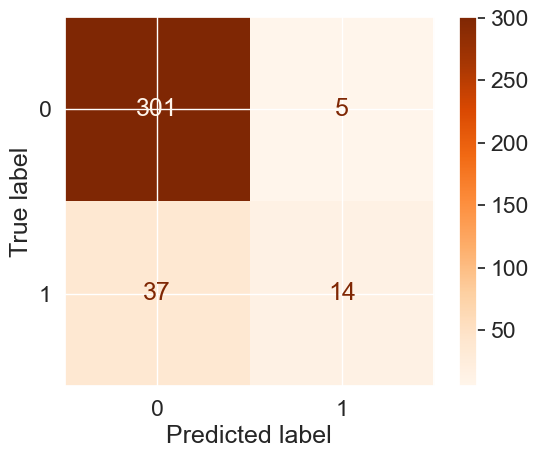

In [203]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [107]:
# Your conclusions here:
#we can conclude that the model has an accurency of .88 but the precision for the type 1 is unprecise because we have a .74.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [205]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [217]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       306
           1       0.84      0.61      0.70        51

    accuracy                           0.93       357
   macro avg       0.89      0.79      0.83       357
weighted avg       0.92      0.93      0.92       357



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

<Figure size 800x600 with 0 Axes>

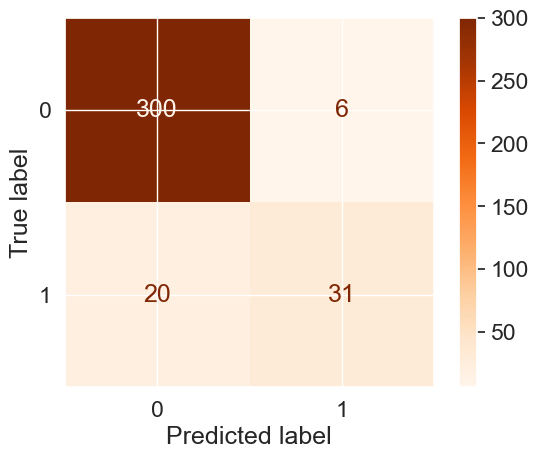

In [219]:
# Your code here:

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [221]:
# Your code here:

model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       306
           1       0.84      0.61      0.70        51

    accuracy                           0.93       357
   macro avg       0.89      0.79      0.83       357
weighted avg       0.92      0.93      0.92       357



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

<Figure size 800x600 with 0 Axes>

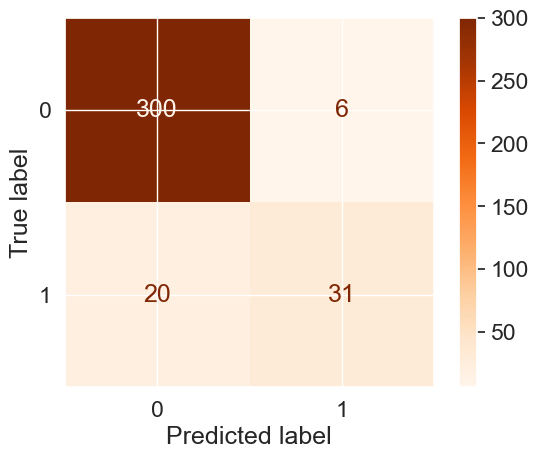

In [223]:
# Your conclusions here:


cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [ ]:
#We can conclude that the model improves with the k = 5 therefore we decide to keep this one.